Which Machine Learning Models are Sensitive to Outliers?

1. Naivye Bayes Classifier ---> Not sensitive to Outliers


2. SVM ---> Not Sensitive to Outliers


3. Linear Regression ---> Sensitive(getting impacted) to Outliers


4. Logistic Regression ---> Sensitive to outliers


5. decision Tree regressor or Classifier ---> Not Sensitive to Outliers


6. Ensemble(Random forest, XGboost, Gradient Boosting) ---> Not Sensitive to Outliers


7. K-Nearest neighbour(KNN) ---> Not Sensitive to Outliers


8. Kmeans ---> Sensitive to Outliers


9. Hierarichal ---> Sensitive to Outliers


10. PCA(Principle Component Analysis) ---> Very Sensitive to Outliers


11. Neural Networks ---> Sensitive to Outliers

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

In [5]:
import seaborn as sns

C:\Users\SG_DELL\AppData\Local\Temp\ipykernel_9412\315930958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<AxesSubplot: xlabel='Age', ylabel='Density'>

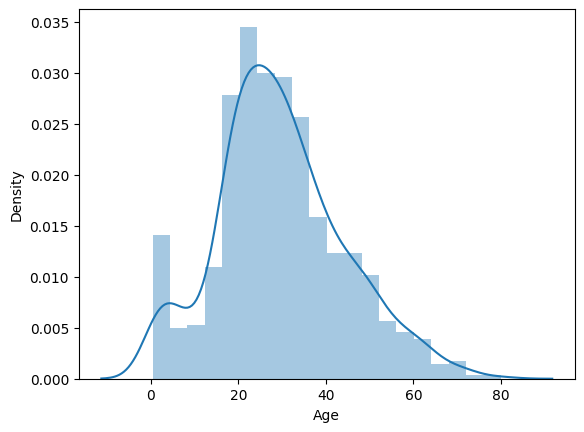

In [9]:
sns.distplot(df['Age'].dropna())

C:\Users\SG_DELL\AppData\Local\Temp\ipykernel_9412\827162487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<AxesSubplot: xlabel='Age', ylabel='Density'>

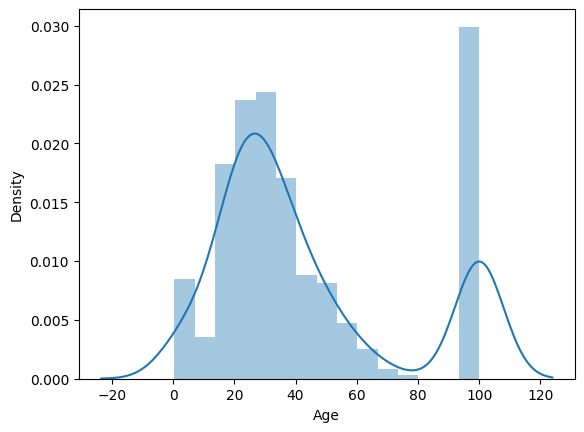

In [10]:
sns.distplot(df['Age'].fillna(100))

### removing outliers in Gaussian Distribution

Text(0, 0.5, 'No of passenger')

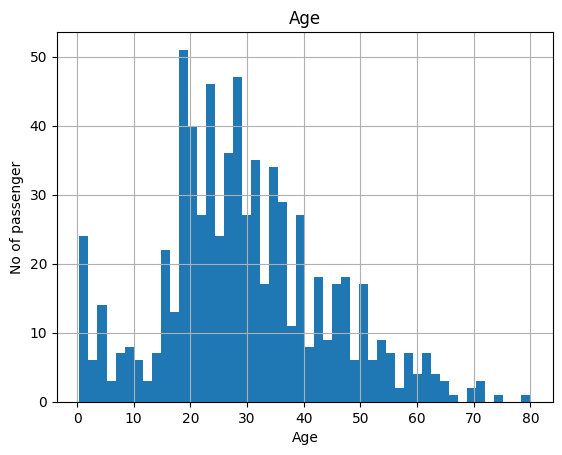

In [14]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

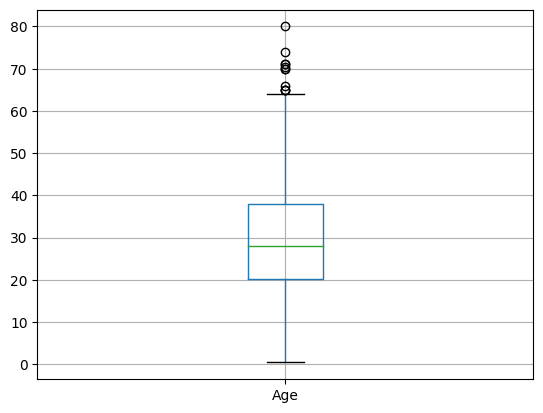

In [16]:
figure=df.boxplot('Age')

In [17]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## if data is normally or gaussian distributed we use below technique

In [18]:
# Assuming Age follows Gaussian distribution, we will calculate  the boundries which differentiates the outliers

df['Age'].mean()

29.69911764705882

In [19]:
upper_boundary=df['Age'].mean() + 3*df['Age'].std()
lower_boundary=df['Age'].mean() - 3*df['Age'].std()

In [20]:
print(lower_boundary),print(upper_boundary),print(df['Age'].mean())

#stop the step until here for the gaussian distribution data.

#here after 73.27 everything will be outlier

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

### If Feature is skewed we use below techniques

Text(0, 0.5, 'No of passenger')

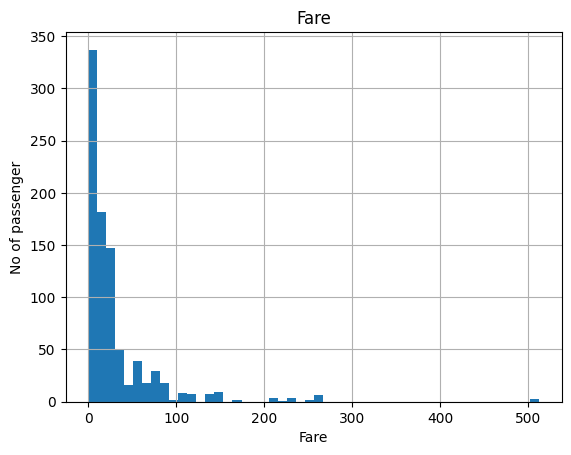

In [30]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot: >

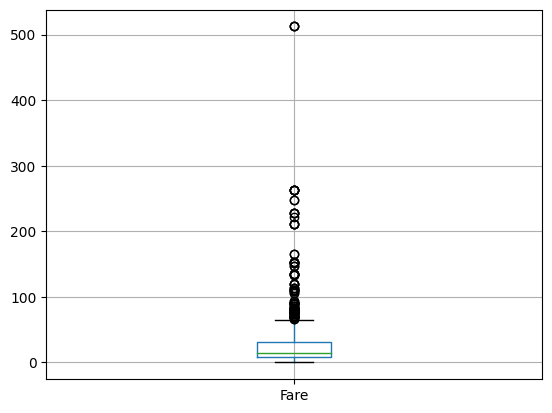

In [32]:
df.boxplot('Fare')

In [33]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [35]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR= df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [36]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [37]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

#here after 100.2688  and -61.358 is outlier

-61.358399999999996
100.2688


(None, None)

In [38]:

data=df.copy()

In [39]:
data.loc[data['Age']>=73,'Age']=73

In [45]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [40]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

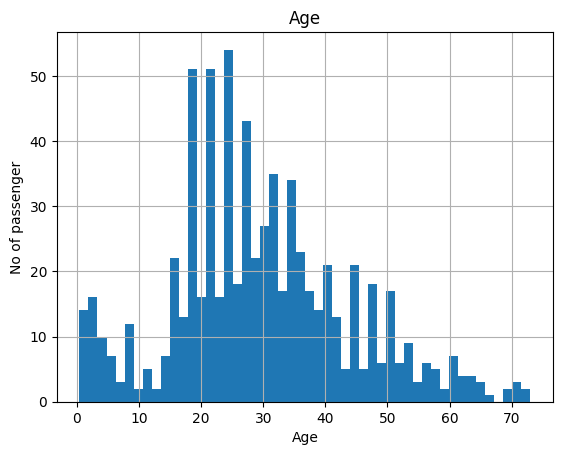

In [46]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

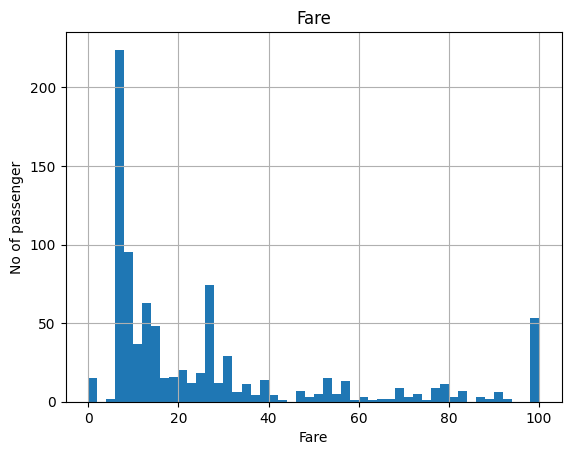

In [42]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)


In [44]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))


Accuracy_score: 0.6828358208955224
roc_auc_score: 0.6765284178187404


In [55]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6567164179104478
roc_auc_score: 0.661689708141321
